In [3]:
from ib_insync import *
import pandas as pd
import asyncio
from IPython.display import display, clear_output
import matplotlib.style
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
plt.style.use("seaborn-v0_8")
import ib_insync.util as util2
util2.startLoop()
ib = IB()

In [4]:
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [5]:
contract = Forex('EURUSD')
contract

Forex('EURUSD', exchange='IDEALPRO')

In [6]:
bars = ib.reqHistoricalData(
    contract,
    endDateTime='',
    durationStr='1000 S',
    barSizeSetting='10 secs',
    whatToShow='MIDPOINT',
    useRTH=True,
    formatDate=2,
    keepUpToDate=True
)

In [7]:
def onBarUpdate(bars, hasNewBar):
    plt.close()
    plot = util.barplot(bars, title="EURUSD", upColor = 'green', downColor='red')
    clear_output(wait=True)
    display(plot)

In [8]:
bars.updateEvent += onBarUpdate

ib.run()

In [30]:
import asyncio

async def func():
    print("started.")
    await asyncio.sleep(2)
    print("done.")

await func()

started.
done.


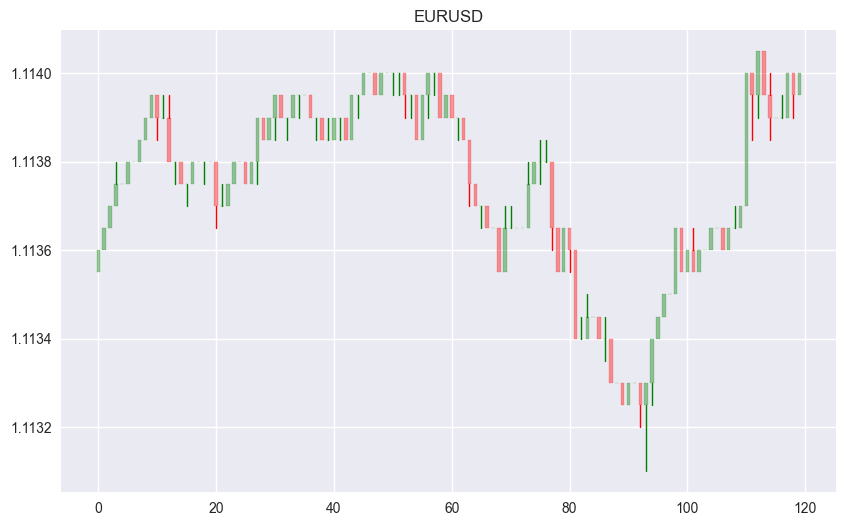

In [26]:
ib.run()

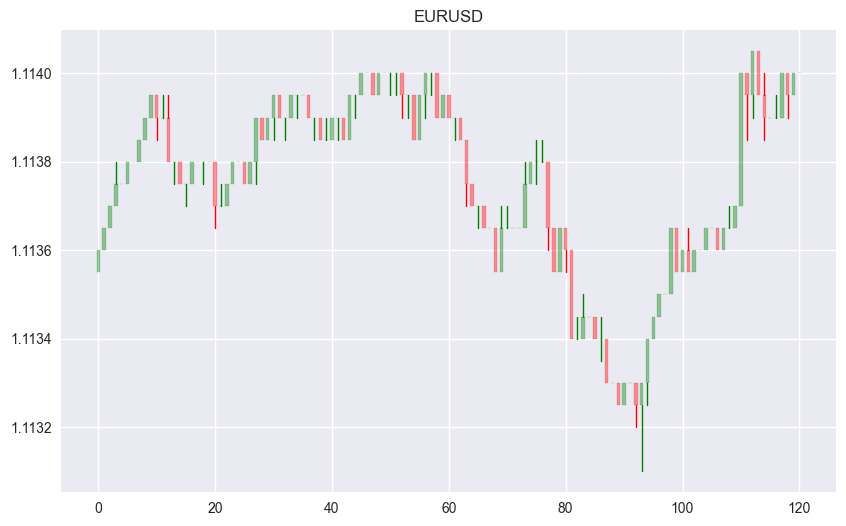

In [27]:
ib.cancelHistoricalData(bars)
ib.disconnect()

In [56]:
import numpy as np
import pandas as pd

from datetime import datetime, timedelta
import time

from ib_insync.ib import IB
from ib_insync.contract import Contract, Option, Future, Forex, Index
import ib_insync.util as util
util.startLoop()

ib = IB()
ib.connect("127.0.0.1", 7497, np.random.randint(0,5_000), readonly=True)


ticker = "EURUSD"
base_contract = Forex(ticker)
all_contracts = ib.reqContractDetails(base_contract)
contract = ib.qualifyContracts(all_contracts[0].contract)[0]


data = ib.reqHistoricalData(contract, "", "1 D", "10 secs", whatToShow="BID", useRTH=False, 
                            formatDate=1, keepUpToDate=True, chartOptions=[], timeout=60)


def get_data():
    global data
    return data

# while True:
#     
#     data = get_data()
#     
#     print(datetime.now(), data[-1].close)
#     
#     IB.sleep(1)

2024-08-22 15:50:52.517562 1.11385
2024-08-22 15:50:53.537286 1.1139
2024-08-22 15:50:54.546211 1.1139
2024-08-22 15:50:55.555707 1.1139
2024-08-22 15:50:56.548246 1.1139
2024-08-22 15:50:57.557722 1.1139
2024-08-22 15:50:58.565607 1.1139
2024-08-22 15:50:59.573798 1.1139
2024-08-22 15:51:00.566522 1.1139
2024-08-22 15:51:01.571964 1.11395
2024-08-22 15:51:02.580234 1.11395
2024-08-22 15:51:03.588005 1.11395
2024-08-22 15:51:04.593138 1.11395
2024-08-22 15:51:05.594251 1.11395
2024-08-22 15:51:06.601982 1.11395
2024-08-22 15:51:07.610569 1.11395
2024-08-22 15:51:08.616678 1.11395
2024-08-22 15:51:09.629184 1.11395
2024-08-22 15:51:10.640726 1.114
2024-08-22 15:51:11.641776 1.114
2024-08-22 15:51:12.650610 1.114
2024-08-22 15:51:13.657890 1.114
2024-08-22 15:51:14.665058 1.114


KeyboardInterrupt: 

In [57]:
import numpy as np
import pandas as pd

from datetime import datetime, timedelta
import time

from ib_insync.ib import IB
from ib_insync.contract import Contract, Option, Future, Forex, Index
import ib_insync.util as util
util.startLoop()

ib = IB()
ib.connect("127.0.0.1", 7497, np.random.randint(0,5_000), readonly=True)
ticker = "EURUSD"
base_contract = Forex(ticker)
all_contracts = ib.reqContractDetails(base_contract)
contract = ib.qualifyContracts(all_contracts[0].contract)[0]



data2 = ib.reqHistoricalData(contract, "", "1 D", "1 min", whatToShow="BID", useRTH=False, 
                            formatDate=1, keepUpToDate=True, chartOptions=[], timeout=60)

def update_data(d, hasNewBar):
    print("callback", datetime.now(), len(d))

data2.updateEvent += update_data
